In [19]:
import sys
import json
import pandas as pd
import numpy as np
import os
print(pd.__version__)

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline



1.4.0


In [24]:
# for fakeSolver
METRIC_NAMES = ['euclidean_distance', 'mse', 'emd', 'f1']

benchmark_files_fixed = [f for f in os.listdir('bsi_zoo/data/') if 'pkl' in f and 'fixed' in f and 'spatialCV' in f and '166' in f]
benchmark_files_free = [f for f in os.listdir('bsi_zoo/data/') if 'pkl' in f and 'free' in f and 'spatialCV' in f and '166' in f]

dfs_fixed = [pd.read_pickle(f'bsi_zoo/data/{file}') for file in benchmark_files_fixed]
dfs_free = [pd.read_pickle(f'bsi_zoo/data/{file}') for file in benchmark_files_free]

df_results_fixed = pd.concat(dfs_fixed)
df_results_free = pd.concat(dfs_free)
df_results_free

,estimator,euclidean_distance,mse,emd,f1,alpha,cov_type,n_sensors,n_sources,n_times,nnz,orientation_type,path_to_leadfield,estimator__alpha,estimator__alpha_cv
0,fake_solver,0.071954,0.001827,0.078062,0.000427,0.99,diag,50,200,10,1,free,bsi_zoo/tests/data/lead_field_free_CC120166.npz,"[0.6628703161826445, 0.4393970560760791, 0.291...",0.66287
1,fake_solver,0.038768,0.003640,0.056058,0.000853,0.99,diag,50,200,10,2,free,bsi_zoo/tests/data/lead_field_free_CC120166.npz,"[0.6628703161826445, 0.4393970560760791, 0.291...",0.66287
2,fake_solver,0.056314,0.005828,0.060424,0.001280,0.99,diag,50,200,10,3,free,bsi_zoo/tests/data/lead_field_free_CC120166.npz,"[0.6628703161826445, 0.4393970560760791, 0.291...",0.66287
3,fake_solver,0.041522,0.010611,0.042672,0.002132,0.99,diag,50,200,10,5,free,bsi_zoo/tests/data/lead_field_free_CC120166.npz,"[0.6628703161826445, 0.4393970560760791, 0.291...",0.66287
4,fake_solver,0.071737,0.004477,0.076055,0.000427,0.90,diag,50,200,10,1,free,bsi_zoo/tests/data/lead_field_free_CC120166.npz,"[0.6628703161826445, 0.4393970560760791, 0.291...",0.66287
5,fake_solver,0.068427,0.006456,0.056003,0.000853,0.90,diag,50,200,10,2,free,bsi_zoo/tests/data/lead_field_free_CC120166.npz,"[0.6628703161826445, 0.4393970560760791, 0.291...",0.66287
6,fake_solver,0.039768,0.011668,0.062604,0.001280,0.90,diag,50,200,10,3,free,bsi_zoo/tests/data/lead_field_free_CC120166.npz,"[0.6628703161826445, 0.4393970560760791, 0.291...",0.66287
7,fake_solver,NaN,0.016670,0.044838,0.002132,0.90,diag,50,200,10,5,free,bsi_zoo/tests/data/lead_field_free_CC120166.npz,"[0.6628703161826445, 0.4393970560760791, 0.291...",0.66287
8,fake_solver,0.078793,0.007419,0.076432,0.000427,0.80,diag,50,200,10,1,free,bsi_zoo/tests/data/lead_field_free_CC120166.npz,"[0.6628703161826445, 0.4393970560760791, 0.291...",0.66287
9,fake_solver,0.034430,0.009650,0.055209,0.000853,0.80,diag,50,200,10,2,free,bsi_zoo/tests/data/lead_field_free_CC120166.npz,"[0.6628703161826445, 0.4393970560760791, 0.291...",0.66287


In [23]:
# removed benchmarks that don't have all metrics.
df_results_fixed = df_results_fixed.dropna(axis=0, how='any')
df_results_free = df_results_free.dropna(axis=0, how='any')

df_results_free.shape

(26, 15)

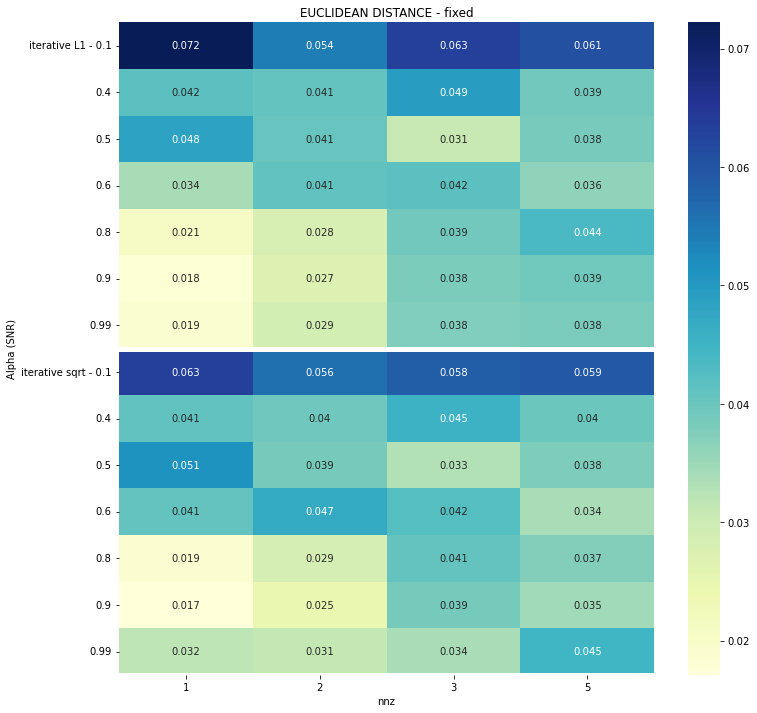

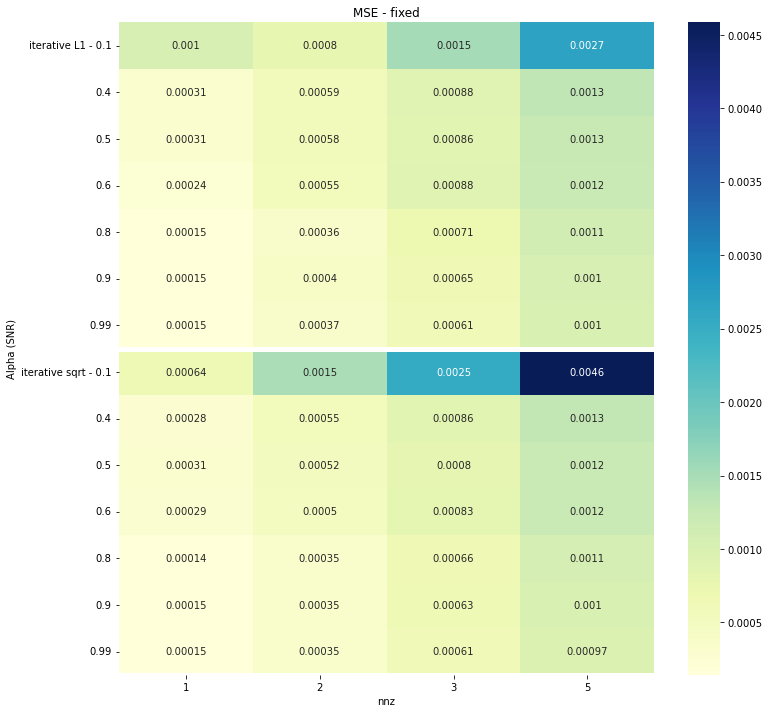

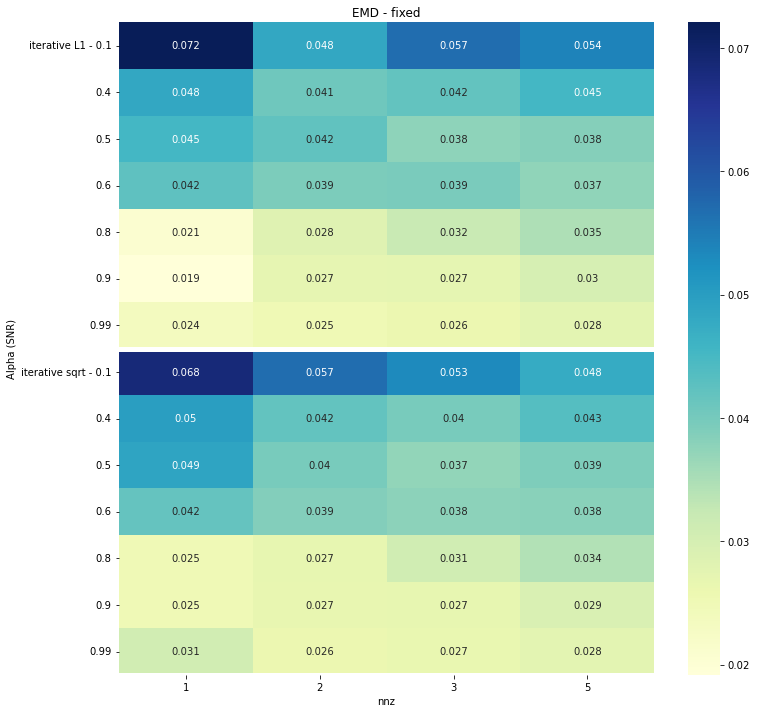

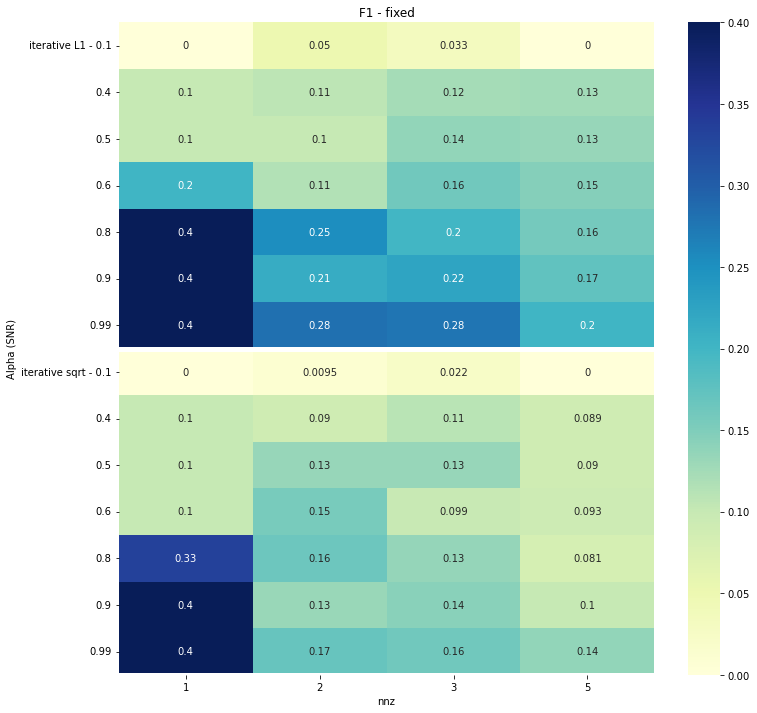

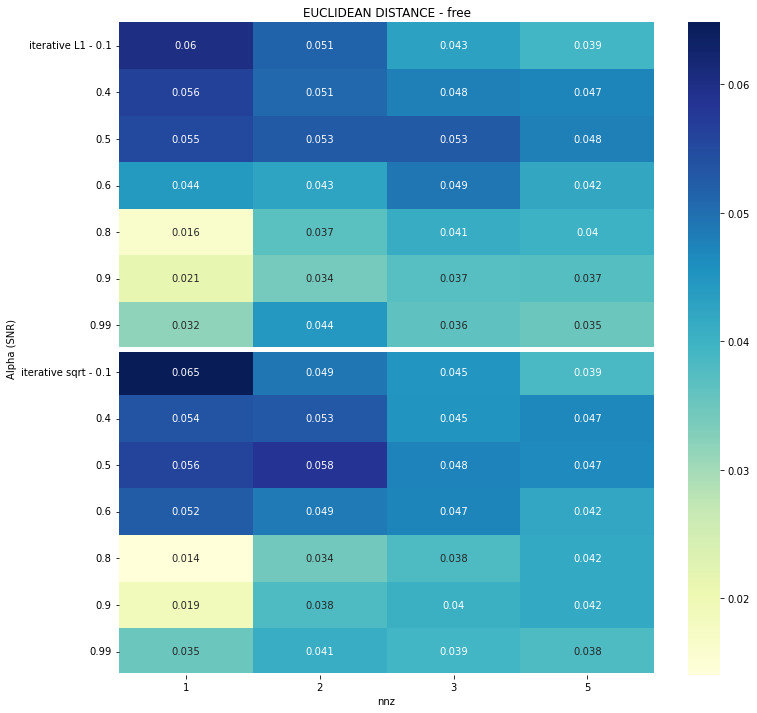

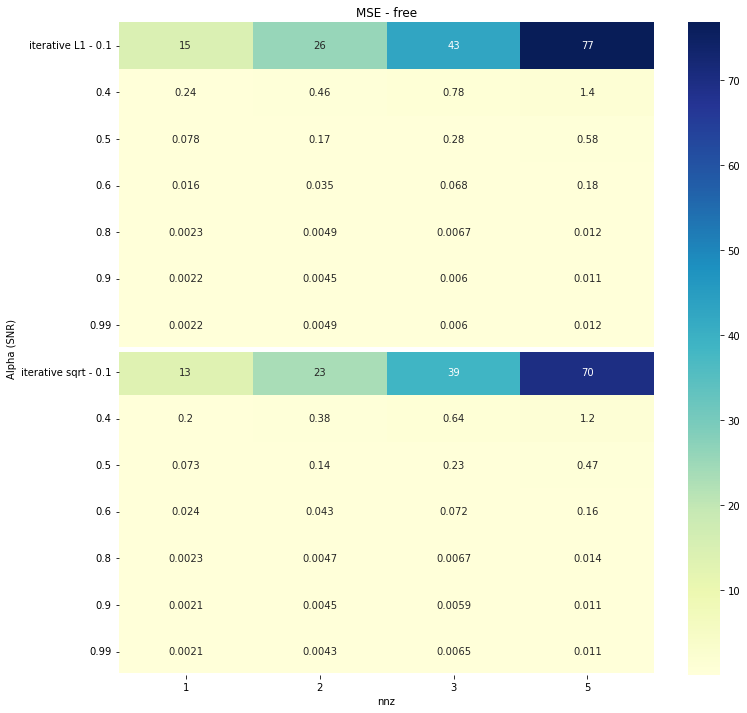

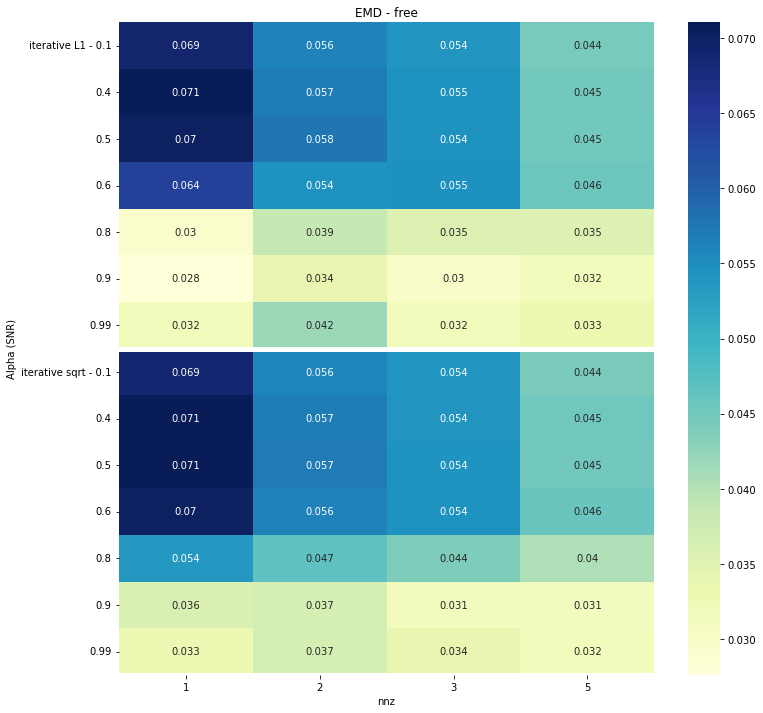

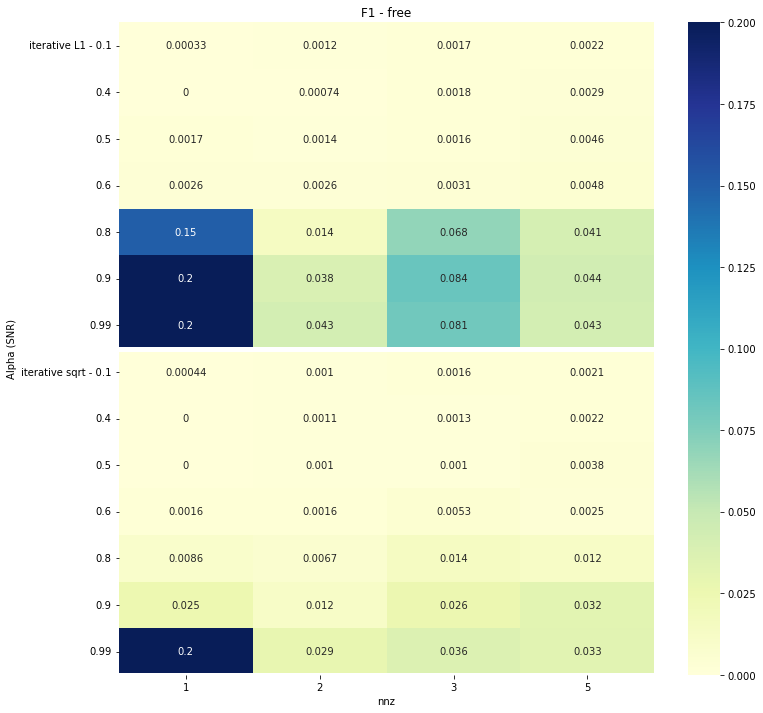

In [5]:
# SNR vs NNZ
for df_results, orientation in zip([df_results_fixed, df_results_free], ["fixed", "free"]):
    for metric in METRIC_NAMES:
        data = df_results.pivot_table(metric, ["estimator", "alpha"], "nnz", aggfunc='mean')

        from collections import OrderedDict
        plt.figure(figsize=(12, 12))
        df=data
        ax = sns.heatmap(df, annot=True, cmap="YlGnBu")

        ylabel_mapping = OrderedDict()
        for estimator, alpha in df.index:
            ylabel_mapping.setdefault(estimator, [])
            ylabel_mapping[estimator].append(alpha)

        hline = []
        new_ylabels = []
        for estimator, alpha_list in ylabel_mapping.items():
            alpha_list[0] = "{} - {}".format(str(estimator).replace("_", " "), alpha_list[0])
            new_ylabels.extend(alpha_list)

            if hline:
                hline.append(len(alpha_list) + hline[-1])
            else:
                hline.append(len(alpha_list))


        ax.hlines(hline, xmin=-1, xmax=4, color="white", linewidth=5)
        ax.set_yticklabels(new_ylabels)
        plt.ylabel('Alpha (SNR)')
        plt.title(f'{metric.replace("_", " ").upper()} - {orientation}')
        plt.savefig(f'bsi_zoo/data/figs/SNR_vs_NNZ_{metric}_{orientation}.png')
        plt.show()

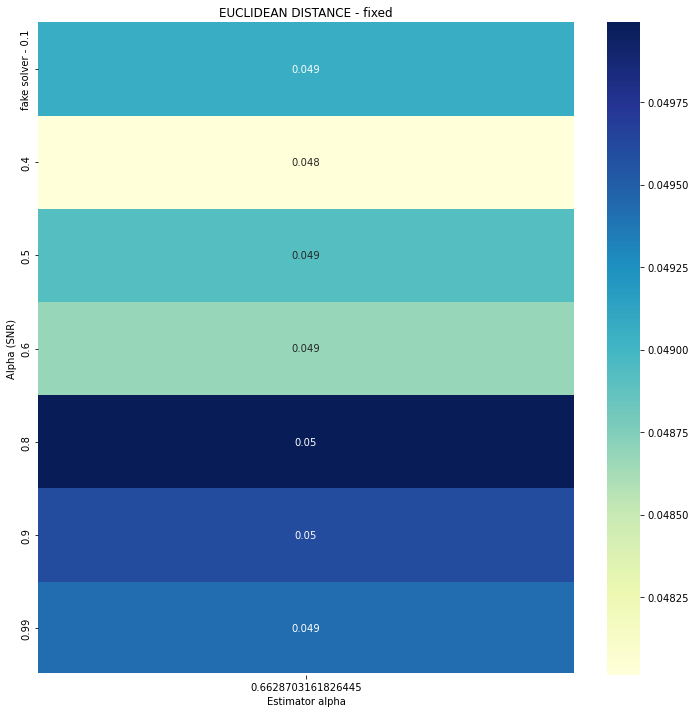

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 864x864 with 0 Axes>

In [25]:
# SNR vs estimator alpha plot
# SNR vs NNZ
for df_results, orientation in zip([df_results_fixed, df_results_free], ["fixed", "free"]):
    for metric in METRIC_NAMES:
        try:
            data = df_results.pivot_table(metric, ["estimator", "alpha"], "estimator__alpha_cv", aggfunc='mean')

            from collections import OrderedDict
            plt.figure(figsize=(12, 12))
            df=data
            ax = sns.heatmap(df, annot=True, cmap="YlGnBu")

            ylabel_mapping = OrderedDict()
            for estimator, alpha in df.index:
                ylabel_mapping.setdefault(estimator, [])
                ylabel_mapping[estimator].append(alpha)

            hline = []
            new_ylabels = []
            for estimator, alpha_list in ylabel_mapping.items():
                alpha_list[0] = "{} - {}".format(str(estimator).replace("_", " "), alpha_list[0])
                new_ylabels.extend(alpha_list)

                if hline:
                    hline.append(len(alpha_list) + hline[-1])
                else:
                    hline.append(len(alpha_list))


            ax.hlines(hline, xmin=-1, xmax=4, color="white", linewidth=5)
            ax.set_yticklabels(new_ylabels)
            plt.ylabel('Alpha (SNR)')
            plt.xlabel('Estimator alpha')
            plt.title(f'{metric.replace("_", " ").upper()} - {orientation}')
            plt.savefig(f'bsi_zoo/data/figs/SNR_vs_estimator_alpha_{metric}_{orientation}.png')
            plt.show()

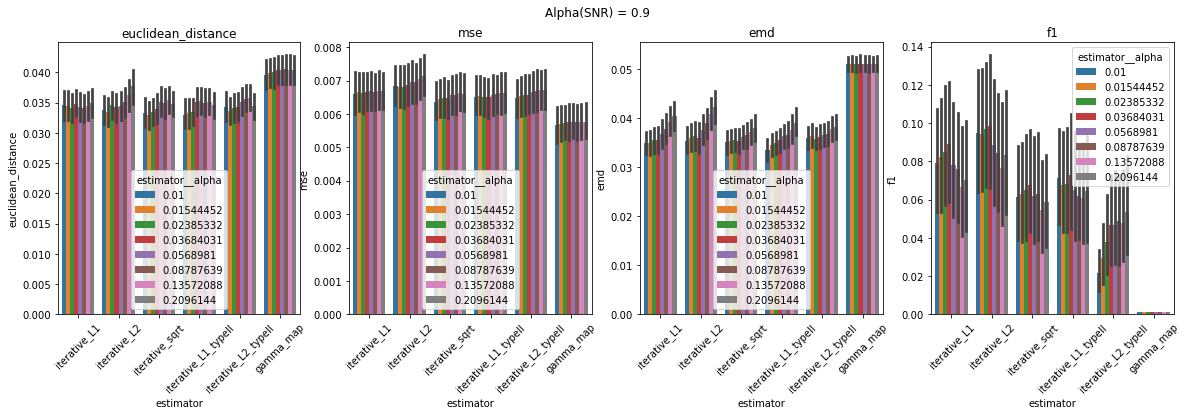

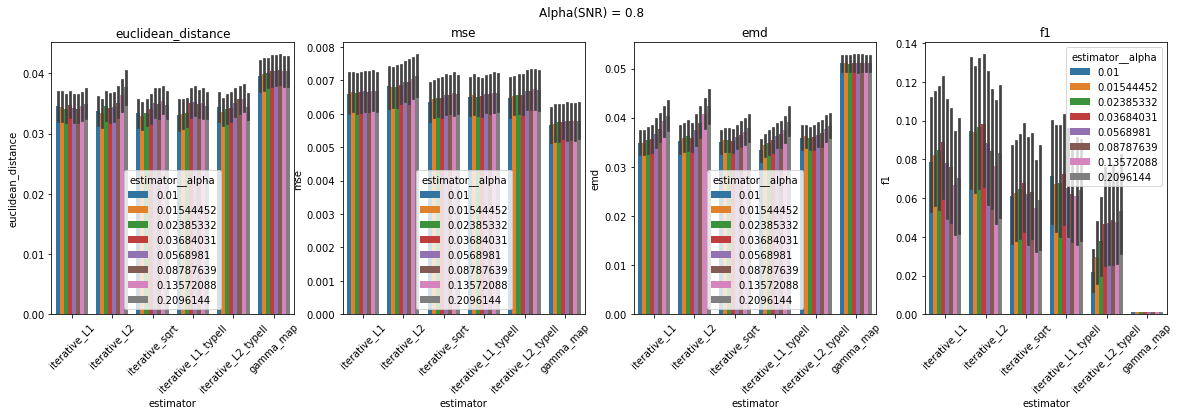

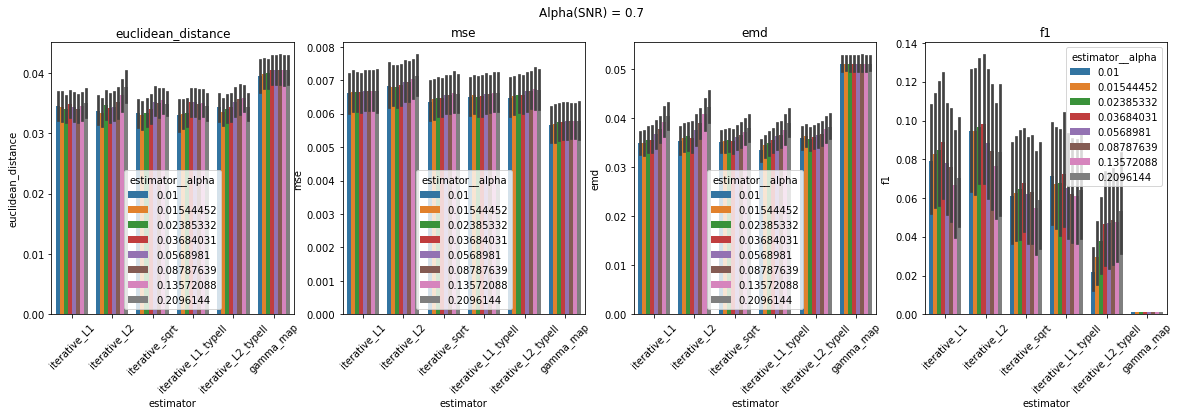

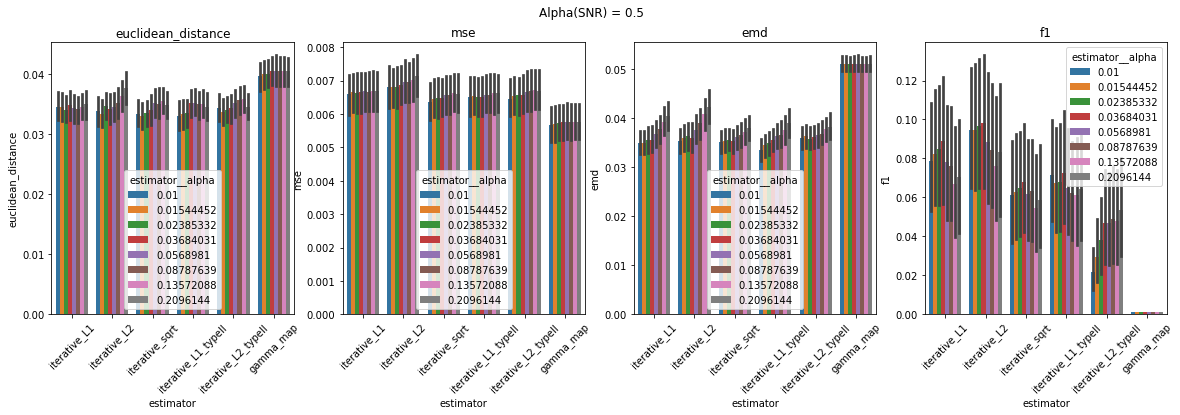

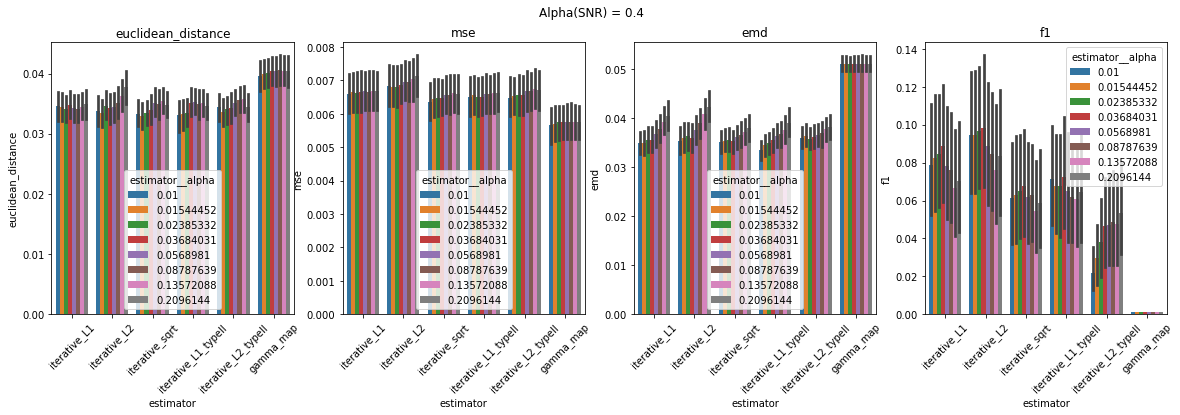

In [7]:
for alpha in df_results["alpha"].unique():
    fig, ax = plt.subplots(1, len(METRIC_NAMES), figsize=(20, 5))
    for i, metric in enumerate(METRIC_NAMES):
        this_df_results = df_results[df_results["alpha"] == alpha]
        sns.barplot(
            data=this_df_results, x="estimator", y=metric, hue="estimator__alpha", ax=ax[i]
        )
        ax[i].set_title(f"{metric}")
        ax[i].tick_params('x', labelrotation=45)

    fig.suptitle(f'Alpha(SNR) = {alpha}')

plt.show()

<Figure size 432x288 with 0 Axes>

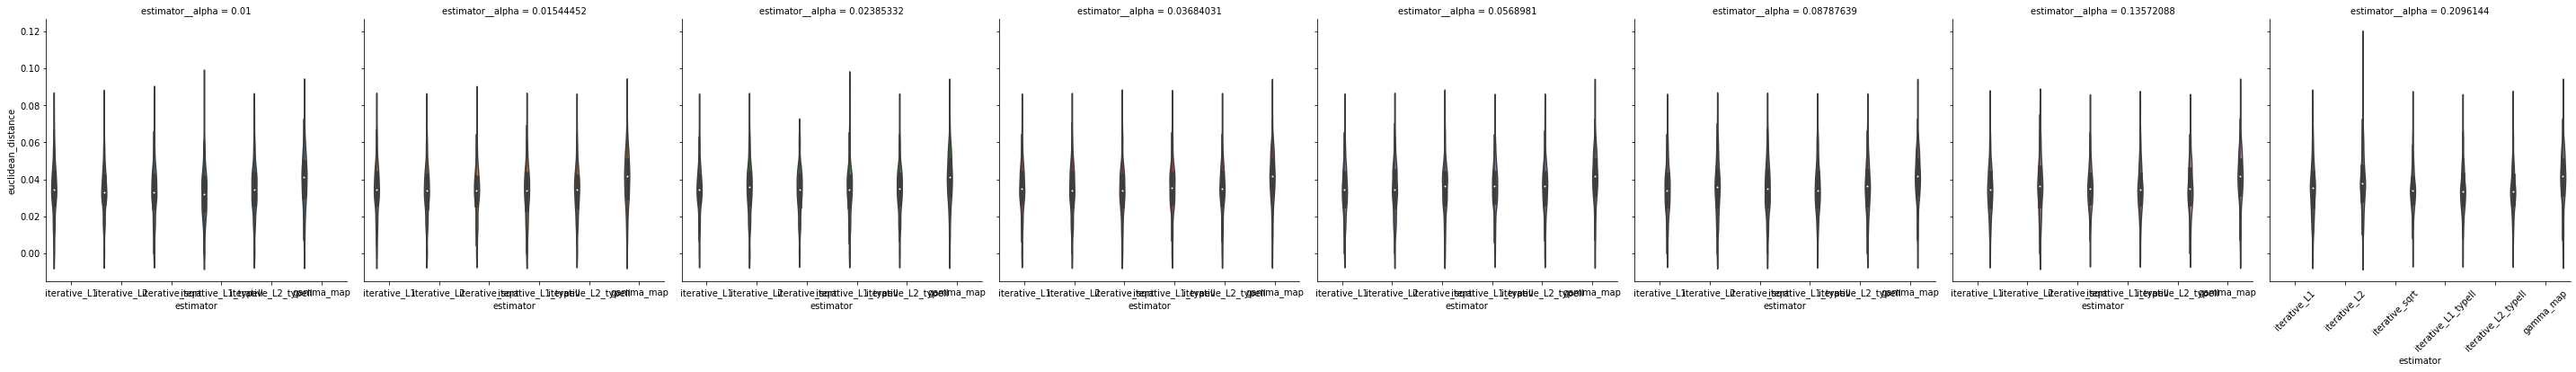

<Figure size 432x288 with 0 Axes>

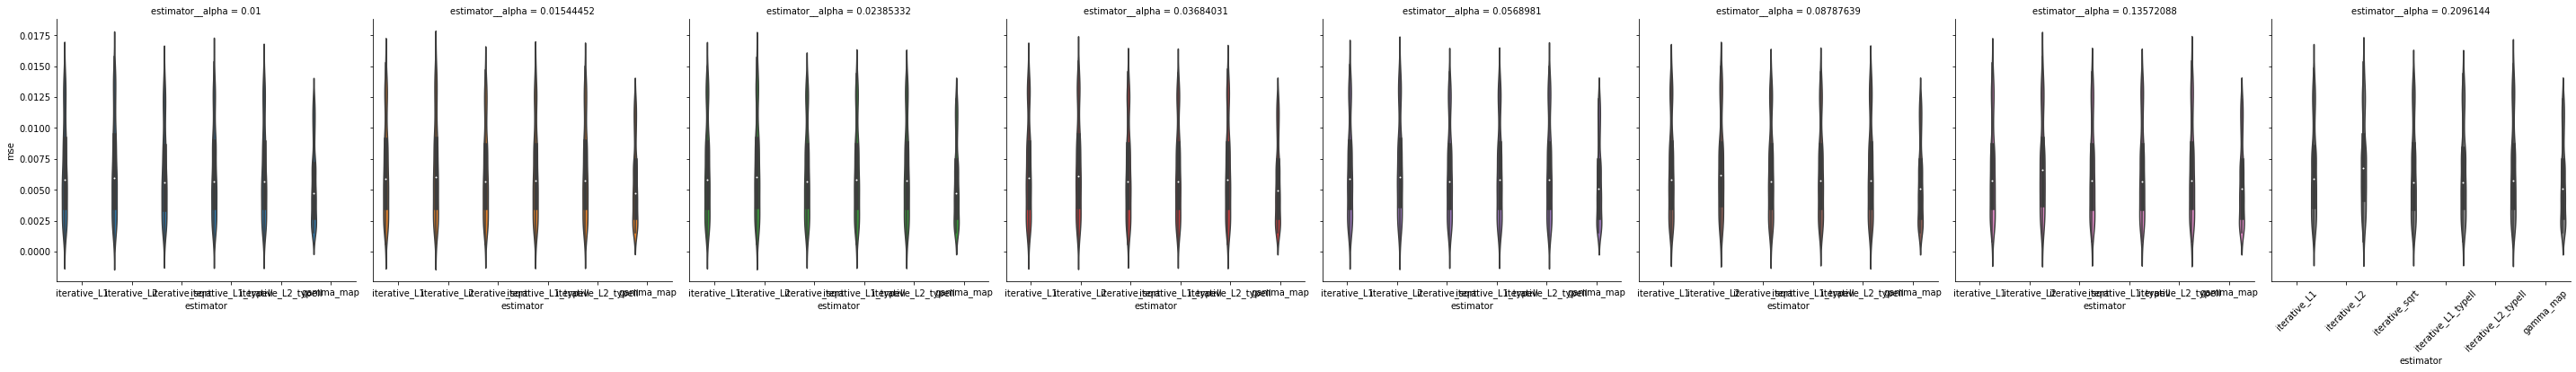

<Figure size 432x288 with 0 Axes>

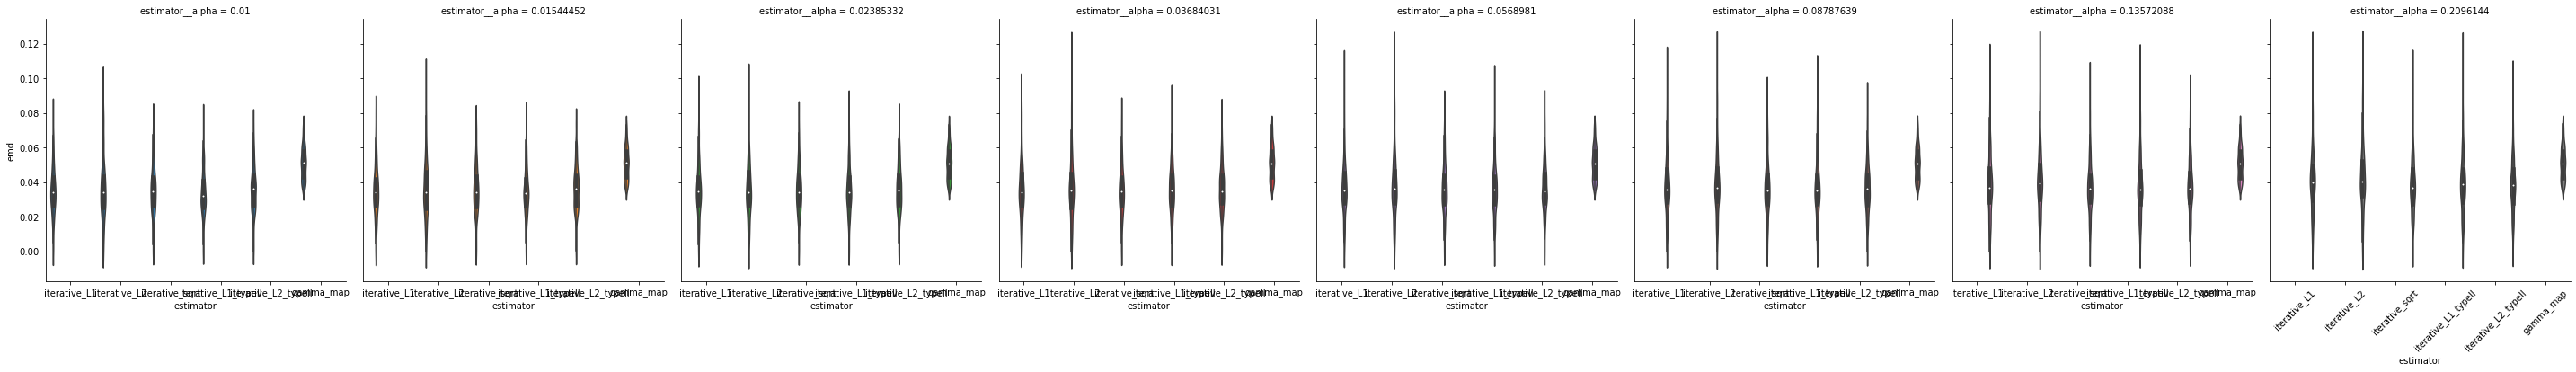

<Figure size 432x288 with 0 Axes>

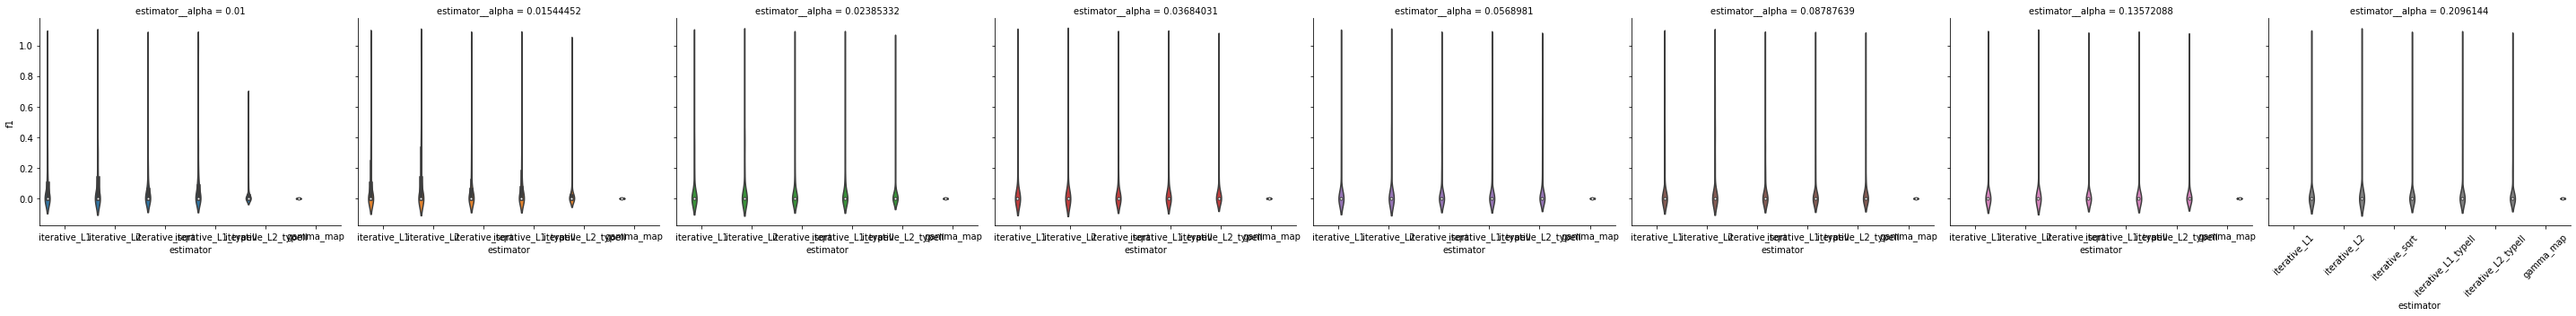

In [8]:
for metric in METRIC_NAMES:
    plt.figure()
    sns.catplot(x="estimator", y=metric, hue="estimator__alpha", data=df_results, ci="sd", kind="violin", col="estimator__alpha")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# def draw_phase_map(val_map, best_map, meth_lab, xlabels, ylabels) :
#     #creation of the figure
#     fig, ax = plt.subplots(figsize=(12, 10))

#     # color map
#     #cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)
#     myColors = ((0.8, 0.0, 0.0, 0.5), (0.0, 0.8, 0.0, 0.5), (0.0, 0.0, 0.8, 0.5),(0.8, 0.8, 0.0, 0.5),(0.8, 0.0, 0.8, 0.5),(0.0, 0.8, 0.8, 0.5))
#     # TODO : Find a better way to generate the right amount of colors
#     cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom', myColors[:len(meth_lab)], len(myColors))

#     # plot heatmap
#     #sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
#     #           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
#     #           cbar_kws={"shrink": .8}, square=True)
#     ax = sb.heatmap(best_map, annot=val_map, 
#             linewidths=5, cmap=cmap, 
#             cbar_kws={"shrink": .8,'label': 'methods'}, square=True)
    
#     # Manually specify colorbar labelling after it's been generated
#     colorbar = ax.collections[0].colorbar
#     colorbar.set_ticks(np.arange(len(meth_lab)))
#     colorbar.set_ticklabels(meth_lab)

#     # ticks
#     plt.yticks(plt.yticks()[0], labels=ylabels, rotation=0)
#     plt.ylabel('nnz')
#     plt.xticks(plt.xticks()[0], labels=xlabels)
#     plt.xlabel('alpha')

#     # title
#     title = 'Phase Diagram of Metric EMD\nWith a standard Leadfield\n'
#     plt.title(title, loc='left', fontsize=18)

#     # Drawing frontier
#     #sb.lineplot([0,1],[1,1])

#     plt.show()

#     return 

# def select_set(df,orient,est_alpha):
#     return df.loc[(df['orientation_type'] == orient) & (df['estimator__alpha'] == est_alpha)]

# def df_to_matrix(df,alpha_set,nnz_set,metric):
#     mat_from_df = np.zeros((len(nnz_set),len(alpha_set)))
#     for i in range(len(nnz_set)):
#         for j in range(len(alpha_set)):
#             mat_from_df[i,j] = df[(df['nnz'] == nnz_set[i]) & (df['alpha'] == alpha_set[j])][metric]
#     return mat_from_df

# def read_data(df, query):
#     subdf = select_set(df,query[0],query[1])

#     alpha_set = np.sort(subdf['alpha'].unique())
#     nnz_set = np.sort(subdf['nnz'].unique())
#     estimators = subdf['estimator'].unique()

#     val = df_to_matrix(subdf.loc[(subdf['estimator'] == estimators[0])],alpha_set,nnz_set,query[2])
#     phase_map = np.zeros((len(nnz_set),len(alpha_set)))

#     for k in range(1,len(estimators)) :
#         estimator = estimators[k]
#         matrix = df_to_matrix(subdf.loc[(subdf['estimator'] == estimator)],alpha_set,nnz_set,query[2])
#         mask = matrix<val
#         val[mask] = matrix[mask]
#         phase_map[mask] = k
    
#     draw_phase_map(val,phase_map,estimators,alpha_set,nnz_set)
#     return val

In [10]:
# read_data(df_results,['fixed',0.2,'f1'])